<a href="https://colab.research.google.com/github/SwethaNandyala/Cancer-prediction-using-custom-Naive-Bayes-classifier/blob/main/Image_Classification_on_CIFAR_10_dataset_using_VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import Sequential,Model
from tensorflow.keras.layers import Conv2D,Dense,Flatten,BatchNormalization,Dropout,MaxPooling2D

from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import L1
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# The classes are:

| Label | Description |
|:-----:|-------------|
|   0   | airplane    |
|   1   | automobile  |
|   2   | bird        |
|   3   | cat         |
|   4   | deer        |
|   5   | dog         |
|   6   | frog        |
|   7   | horse       |
|   8   | ship        |
|   9   | truck       |

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size=0.10,random_state = 42)

In [4]:
import cv2

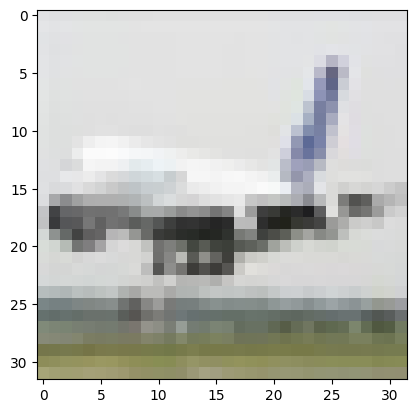

In [5]:
plt.imshow(x_train[2])

In [6]:
y_train[2] #-->airplane

array([0], dtype=uint8)

In [7]:
sample_resized = cv2.resize(x_train[2],(64,64),interpolation = cv2.INTER_AREA)

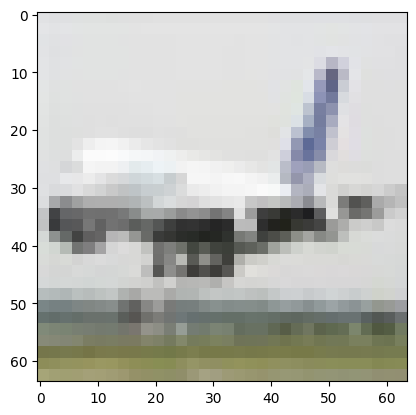

In [8]:
plt.imshow(sample_resized)

In [9]:
x_train = np.array([cv2.resize(i,(64,64),interpolation = cv2.INTER_AREA) for i in x_train])
x_val  = np.array([cv2.resize(i,(64,64),interpolation = cv2.INTER_AREA) for i in x_val])
X_test  = np.array([cv2.resize(i,(64,64),interpolation = cv2.INTER_AREA) for i in x_test])

In [10]:
X_test = X_test/255.0

In [11]:
y_train = to_categorical(y_train,10)
y_val = to_categorical(y_val,10)
y_test = to_categorical(y_test,10)

In [12]:
input_shape = x_train[0].shape
no_of_classes = 10

In [13]:
from tensorflow.keras.applications import vgg16 as vgg

In [14]:
basemodel = vgg.VGG16(include_top=False,
    weights='imagenet',
    input_shape=input_shape,
    classes=no_of_classes)

In [15]:
basemodel.input_shape

(None, 64, 64, 3)

In [16]:
basemodel.output_shape

(None, 2, 2, 512)

In [17]:
basemodel.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [18]:
block3_output = basemodel.get_layer('block3_pool').output
## Add our dense layers
x= BatchNormalization()(block3_output)

x = Flatten()(x)

#Adding the Dense layers

x = Dense(512,activation=('relu'))(x)
x = Dense(256,activation=('relu'))(x)
output = Dense(no_of_classes,activation=('softmax'))(x)
#This is the classification layer

In [19]:
model = Model(inputs=basemodel.input, outputs=output)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [20]:
for layer in basemodel.layers:
    layer.trainable = False

In [21]:
opt = Adam(learning_rate=0.0001)
model.compile(optimizer=opt,loss=CategoricalCrossentropy(),metrics=['accuracy'])

In [22]:
no_of_epochs = 4
batch_size = 64

In [23]:
train_datagen = ImageDataGenerator(horizontal_flip=True,rescale=1.0/255)
train_datagen.fit(x_train)
train_datagenerator = train_datagen.flow(x_train,y_train,batch_size=batch_size)

In [24]:
val_datagen = ImageDataGenerator(horizontal_flip=True,rescale=1.0/255)
val_datagen.fit(x_val)
val_datagenerator = val_datagen.flow(x_val,y_val,batch_size=batch_size)

In [25]:

train_steps_per_epoch = x_train.shape[0]//batch_size
val_steps_per_epoch = x_val.shape[0]//batch_size

hist = model.fit(train_datagenerator,steps_per_epoch=train_steps_per_epoch,validation_data=val_datagenerator,
                 validation_steps=val_steps_per_epoch,epochs=no_of_epochs,verbose=1)

Epoch 1/4
703/703 [==============================] - 23s 22ms/step - loss: 0.7751 - accuracy: 0.7337 - val_loss: 0.6018 - val_accuracy: 0.7955
Epoch 2/4
703/703 [==============================] - 15s 21ms/step - loss: 0.4408 - accuracy: 0.8502 - val_loss: 0.5608 - val_accuracy: 0.8143
Epoch 3/4
703/703 [==============================] - 15s 21ms/step - loss: 0.3060 - accuracy: 0.8977 - val_loss: 0.5174 - val_accuracy: 0.8305
Epoch 4/4
703/703 [==============================] - 15s 21ms/step - loss: 0.2223 - accuracy: 0.9289 - val_loss: 0.5280 - val_accuracy: 0.8333


In [26]:
model.save("cifar10_vgg16_rev1.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [27]:
scores = model.evaluate(X_test,y_test)

313/313 [==============================] - 4s 10ms/step - loss: 0.5387 - accuracy: 0.8220


In [28]:
print(f"Test Accuracy {scores[1]}")

Test Accuracy 0.8220000267028809


## The model overfits lets see by doing L1 regularisation

In [29]:
## Add our dense layers

x= BatchNormalization()(block3_output)

x = Flatten()(x)

#Adding the Dense layers

x = Dense(512,activation=('relu'),kernel_regularizer=L1(0.01))(x)
x = Dense(256,activation=('relu'),kernel_regularizer=L1(0.01))(x)
output2= Dense(no_of_classes,activation=('softmax'))(x)
#This is the classification layer

In [30]:
model2 = Model(inputs=basemodel.input, outputs=output2)
model2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0   

In [31]:
opt = Adam(learning_rate=0.0001)

In [32]:
model2.compile(optimizer=opt,loss=CategoricalCrossentropy(),metrics=['accuracy'])
hist2 = model2.fit(train_datagenerator,steps_per_epoch=train_steps_per_epoch,validation_data=val_datagenerator,
                 validation_steps=val_steps_per_epoch,epochs=10,verbose=1)
model2.save("cifar10_vgg16_rev2.h5")

Epoch 1/10
703/703 [==============================] - 18s 23ms/step - loss: 106.3777 - accuracy: 0.4564 - val_loss: 7.0791 - val_accuracy: 0.4283
Epoch 2/10
703/703 [==============================] - 16s 22ms/step - loss: 3.4316 - accuracy: 0.4904 - val_loss: 2.8138 - val_accuracy: 0.5401
Epoch 3/10
703/703 [==============================] - 16s 22ms/step - loss: 2.7604 - accuracy: 0.5615 - val_loss: 2.7034 - val_accuracy: 0.5859
Epoch 4/10
703/703 [==============================] - 16s 23ms/step - loss: 2.6774 - accuracy: 0.5923 - val_loss: 2.6509 - val_accuracy: 0.6020
Epoch 5/10
703/703 [==============================] - 16s 22ms/step - loss: 2.6282 - accuracy: 0.6111 - val_loss: 2.6128 - val_accuracy: 0.6128
Epoch 6/10
703/703 [==============================] - 16s 23ms/step - loss: 2.5968 - accuracy: 0.6190 - val_loss: 2.5889 - val_accuracy: 0.6138
Epoch 7/10
703/703 [==============================] - 17s 25ms/step - loss: 2.5708 - accuracy: 0.6265 - val_loss: 2.5632 - val_accurac

In [33]:
scores2 = model2.evaluate(X_test,y_test)
print(f"Test Accuracy {scores2[1]}")

313/313 [==============================] - 3s 10ms/step - loss: 2.5014 - accuracy: 0.6488
Test Accuracy 0.6488000154495239


#### Drop out Regularisation

In [34]:
## Add our dense layers
x= BatchNormalization()(block3_output)
x = Flatten()(x)

#Adding the Dense layers

x = Dense(512,activation=('relu'))(x)
x = Dropout(0.5)(x)
x = Dense(256,activation=('relu'))(x)
x = Dropout(0.5)(x)
output3= Dense(no_of_classes,activation=('softmax'))(x)
#This is the classification layer

model3 = Model(inputs=basemodel.input, outputs=output3)
model3.summary()

opt = Adam(learning_rate=0.0001)

model3.compile(optimizer=opt,loss=CategoricalCrossentropy(),metrics=['accuracy'])
hist3 = model3.fit(train_datagenerator,steps_per_epoch=train_steps_per_epoch,validation_data=val_datagenerator,
                 validation_steps=val_steps_per_epoch,epochs=10,verbose=1)
model3.save("cifar10_vgg16_rev3.h5")

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0   

In [35]:
scores3 = model3.evaluate(X_test,y_test)
print(f"Test Accuracy {scores3[1]}")

313/313 [==============================] - 3s 9ms/step - loss: 0.4910 - accuracy: 0.8359
Test Accuracy 0.8359000086784363


In [36]:
### Reduce the complexity of the model

In [37]:
block2_output = basemodel.get_layer('block2_pool').output

## Add our dense layers
x= BatchNormalization()(block2_output)
x = Flatten()(x)

#Adding the Dense layers

x = Dense(512,activation=('relu'))(x)
x = Dropout(0.5)(x)
x = Dense(256,activation=('relu'))(x)
x = Dropout(0.5)(x)
output4= Dense(no_of_classes,activation=('softmax'))(x)
#This is the classification layer

model4 = Model(inputs=basemodel.input, outputs=output4)
model4.summary()

opt = Adam(learning_rate=0.0001)

model4.compile(optimizer=opt,loss=CategoricalCrossentropy(),metrics=['accuracy'])
hist4 = model4.fit(train_datagenerator,steps_per_epoch=train_steps_per_epoch,validation_data=val_datagenerator,
                 validation_steps=val_steps_per_epoch,epochs=10,verbose=1)
model3.save("cifar10_vgg16_rev4.h5")

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0   

In [38]:
scores4 = model4.evaluate(X_test,y_test)
print(f"Test Accuracy {scores4[1]}")

313/313 [==============================] - 2s 7ms/step - loss: 0.7907 - accuracy: 0.7380
Test Accuracy 0.7379999756813049


In [39]:
## Add our dense layers
x= BatchNormalization()(block3_output)
x = Flatten()(x)

#Adding the Dense layers

x = Dense(512,activation=('relu'))(x)
x = Dropout(0.25)(x)
x = Dense(256,activation=('relu'))(x)
x = Dropout(0.25)(x)
output5= Dense(no_of_classes,activation=('softmax'))(x)
#This is the classification layer

model5 = Model(inputs=basemodel.input, outputs=output5)
model5.summary()

opt = Adam(learning_rate=0.0001)

model5.compile(optimizer=opt,loss=CategoricalCrossentropy(),metrics=['accuracy'])
hist5 = model5.fit(train_datagenerator,steps_per_epoch=train_steps_per_epoch,validation_data=val_datagenerator,
                 validation_steps=val_steps_per_epoch,epochs=10,verbose=1)
model5.save("cifar10_vgg16_rev5.h5")

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0   

In [40]:
scores5 = model5.evaluate(X_test,y_test)
print(f"Test Accuracy {scores5[1]}")

313/313 [==============================] - 3s 9ms/step - loss: 0.5205 - accuracy: 0.8387
Test Accuracy 0.838699996471405


In [41]:
## Add our dense layers
x= BatchNormalization()(block3_output)
x = Flatten()(x)

#Adding the Dense layers

x = Dense(512,activation=('relu'))(x)
x = BatchNormalization()(x)
x = Dropout(0.25)(x)
x = Dense(256,activation=('relu'))(x)
x = BatchNormalization()(x)
x = Dropout(0.25)(x)
output6= Dense(no_of_classes,activation=('softmax'))(x)
#This is the classification layer

model6 = Model(inputs=basemodel.input, outputs=output6)
model6.summary()

opt = Adam(learning_rate=0.0001)

model6.compile(optimizer=opt,loss=CategoricalCrossentropy(),metrics=['accuracy'])
hist6 = model6.fit(train_datagenerator,steps_per_epoch=train_steps_per_epoch,validation_data=val_datagenerator,
                 validation_steps=val_steps_per_epoch,epochs=10,verbose=1)
model6.save("cifar10_vgg16_rev6.h5")

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0   

In [42]:
scores6 = model6.evaluate(X_test,y_test)
print(f"Test Accuracy {scores6[1]}")

313/313 [==============================] - 3s 10ms/step - loss: 0.4977 - accuracy: 0.8419
Test Accuracy 0.8418999910354614


In [43]:
## Add our dense layers
block5_output = basemodel.get_layer('block5_pool').output
x= BatchNormalization()(block5_output)
x = Flatten()(x)

#Adding the Dense layers

x = Dense(512,activation=('relu'))(x)
x = BatchNormalization()(x)
x = Dropout(0.25)(x)
x = Dense(256,activation=('relu'))(x)
x = BatchNormalization()(x)
x = Dropout(0.25)(x)
output7= Dense(no_of_classes,activation=('softmax'))(x)
#This is the classification layer

model7 = Model(inputs=basemodel.input, outputs=output7)
model7.summary()

opt = Adam(learning_rate=0.0001)

model7.compile(optimizer=opt,loss=CategoricalCrossentropy(),metrics=['accuracy'])
hist7 = model7.fit(train_datagenerator,steps_per_epoch=train_steps_per_epoch,validation_data=val_datagenerator,
                 validation_steps=val_steps_per_epoch,epochs=10,verbose=1)
model7.save("cifar10_vgg16_rev7.h5")

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0   

In [44]:

scores7 = model7.evaluate(X_test,y_test)
print(f"Test Accuracy {scores7[1]}")

313/313 [==============================] - 5s 16ms/step - loss: 0.7843 - accuracy: 0.7352
Test Accuracy 0.7351999878883362
